In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
HISTLEN=32

In [77]:
import matplotlib.pyplot as plt
from datasets import *
from glob import glob
import json

In [78]:
allfiles = glob('/home/ubuntu/datasets/knn/*')
print(len(allfiles))
print(allfiles[0])

220
/home/ubuntu/datasets/knn/knn_pm25_1FD7_K08.csv


In [79]:
locids = []
for fname in allfiles:
    lid = fname.split('_')[2]
    if lid not in locids: locids.append(lid)
print(len(locids), locids)

# knums = []
# for fname in allfiles:
#     kn = int(fname.split('_')[3].replace('.csv', '').replace('K', ''))
#     if kn not in knums: knums.append(kn)
# knums = sorted(knums)
# print(len(knums), knums)

22 ['1FD7', 'BFDC', '91B8', '72CA', 'C0A7', 'A9BE', '8E2A', '5D7A', '2E9C', 'E1F8', 'DF07', 'D804', 'E47A', '20CA', 'CBC7', '113E', 'BB4A', 'E8E4', 'BC46', '498F', 'E486', '4BE7']


In [84]:
STRIDE = 2
HISTLEN = 32

datakey = lambda lid, kii, tstart: '%s_%d_%s' % (lid, kii, tstart)

datainds = []
for lid in locids:
    for kii in range(10):
        train_set, test_set = create_dataset_knodes_sensorid(
            lid, kii+1, split=0.8)
    
        for tii in range(0, train_set.shape[1]-HISTLEN, STRIDE):
            if any(pd.isnull(train_set[0][tii:tii+HISTLEN])):
                # valid for histlen
                continue
            datainds.append(datakey(lid, kii+1, tii))
                
print('Collected inds: %d' % len(datainds))

2018-03-22 12:45:00 2018-07-09 03:00:00 2018-03-22T12:45:00 2018-07-09T03:00:00
2018-04-06 05:15:00 2018-07-09 03:00:00 2018-04-06T05:15:00 2018-07-09T03:00:00
2018-08-13 03:45:00 2018-09-25 14:00:00 2018-08-13T03:45:00 2018-09-25T14:00:00
2018-08-13 03:45:00 2018-09-25 14:00:00 2018-08-13T03:45:00 2018-09-25T14:00:00
2018-07-31 17:30:00 2018-08-11 18:15:00 2018-07-31T17:30:00 2018-08-11T18:15:00
2018-08-05 13:15:00 2018-08-11 18:15:00 2018-08-05T13:15:00 2018-08-11T18:15:00
2018-07-09 03:30:00 2018-07-24 02:15:00 2018-07-09T03:30:00 2018-07-24T02:15:00
2018-07-09 03:30:00 2018-07-24 02:15:00 2018-07-09T03:30:00 2018-07-24T02:15:00
2018-08-13 03:45:00 2018-08-22 17:15:00 2018-08-13T03:45:00 2018-08-22T17:15:00
2018-07-09 03:30:00 2018-07-19 22:15:00 2018-07-09T03:30:00 2018-07-19T22:15:00
2018-03-22 12:45:00 2018-07-09 03:00:00 2018-03-22T12:45:00 2018-07-09T03:00:00
2018-04-08 08:15:00 2018-07-09 03:00:00 2018-04-08T08:15:00 2018-07-09T03:00:00
2018-08-13 03:45:00 2018-09-25 14:00:00 

KeyboardInterrupt: 

In [82]:
print(datainds[0], datainds[-1])

with open('.k_train_indices.json', 'w') as fl:
    json.dump(datainds, fl, indent=4)

1FD7_1_5176 4BE7_8_1114


In [70]:
from random import shuffle
train_refs = create_dataset_knodes(max_nodes=2)
shuffle(train_refs)

['20CA_2_5652', 'CBC7_2_4596', 'BC46_2_2762', 'BC46_2_2868', 'CBC7_2_4042', 'C0A7_1_3678', '20CA_2_3110', '72CA_2_4216', '2E9C_1_6308', '2E9C_1_6144', '498F_2_3554', 'BB4A_2_4334', 'E47A_1_5504', 'BC46_1_5624', '498F_2_2898', 'CBC7_2_4348', 'CBC7_2_4154', 'C0A7_1_4814', 'E47A_1_4656', 'BC46_2_1308', '498F_1_5000', '20CA_1_5504', 'E47A_1_5538', 'BFDC_1_3262', '91B8_2_3984', 'D804_2_3984', 'E486_2_4302', '91B8_1_4858', '5D7A_2_458', 'D804_2_3706', 'A9BE_1_6156', '5D7A_1_4360']
(32, 10, 32)
[60.666668 62.666668 63.       63.       62.       63.333332 62.333332
 63.666668 67.666664 66.333336 71.666664 69.       70.       70.666664
 68.333336 69.       71.       73.       69.       60.666668 63.333332
 59.666668 54.       54.       53.666668 57.666668 57.666668 56.
 62.       63.       58.333332 62.      ]


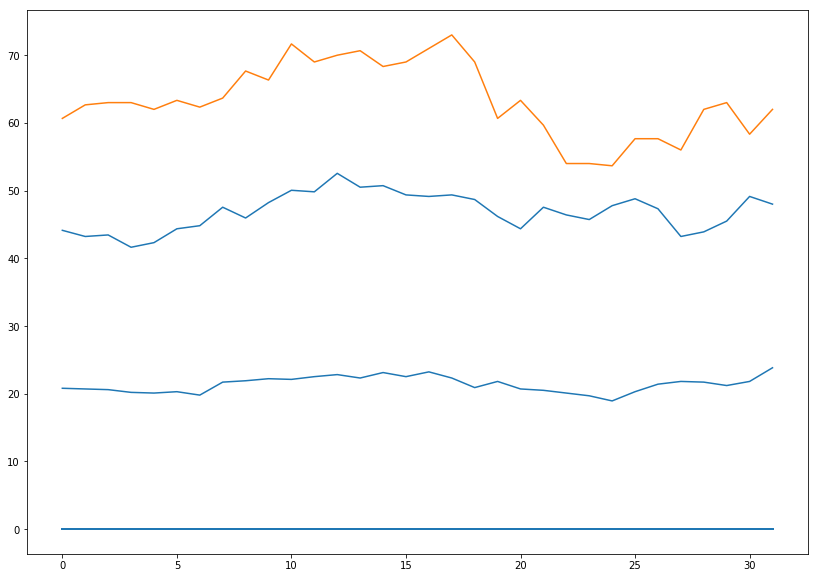

In [75]:
print(train_refs[:32])
batch, labels = knodes_batch(train_refs[:32])
print(batch.shape)

plt.figure(figsize=(14, 10))
for ii in range(10):
    plt.plot(batch[0, ii], color='C0')
    
plt.plot(labels[0], color='C1')
print(labels[0])
plt.show(); plt.close()